<a href="https://colab.research.google.com/github/Mackenzie2407/Project-2/blob/main/CP2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
df1 = pd.read_csv('/content/drive/MyDrive/survey_complete_.csv')
df2 = pd.read_csv('/content/drive/MyDrive/survey_item.csv')
df3 = pd.read_csv('/content/drive/MyDrive/survey_main.csv')
df4 = pd.read_csv('/content/drive/MyDrive/survey_result.csv')
df5 = pd.read_csv('/content/drive/MyDrive/membership.csv')
df6 = pd.read_csv('/content/drive/MyDrive/schedule2022120221019212245.csv') #XML파일 csv로 변환
df7 = pd.read_csv('/content/drive/MyDrive/d95e264436cf42de.csv')
df8 = pd.read_csv('/content/drive/MyDrive/reserve_ticket_2022.csv') 

In [130]:
df1.head(3)

,idx,survey_idx,state,start_date,end_date,MB_IDX,MB_AGE,zipcode,job,favorite_idx
0,41,24,C,2020-09-03 17:28:21,2020-09-03 17:33:34,1353,1996,22230.0,대학생(대학원생 포함),송시우
1,46,24,C,2020-09-03 17:26:03,2020-09-03 17:29:55,102758,1988,21340.0,회사원(사무직/연구직),김도혁
2,49,24,C,2020-09-03 17:26:12,2020-09-03 17:28:56,107675,1974,10884.0,기타,김도혁


In [131]:
df1.isnull().sum()

idx               0
survey_idx        0
state             0
start_date        0
end_date          0
MB_IDX            0
MB_AGE            0
zipcode           9
job             390
favorite_idx      0
dtype: int64

In [132]:
df1.duplicated().sum()

0

In [133]:
df1.rename(columns = {'idx' : 'survey_target_idx'}, inplace=True)
df1.head(3)

,survey_target_idx,survey_idx,state,start_date,end_date,MB_IDX,MB_AGE,zipcode,job,favorite_idx
0,41,24,C,2020-09-03 17:28:21,2020-09-03 17:33:34,1353,1996,22230.0,대학생(대학원생 포함),송시우
1,46,24,C,2020-09-03 17:26:03,2020-09-03 17:29:55,102758,1988,21340.0,회사원(사무직/연구직),김도혁
2,49,24,C,2020-09-03 17:26:12,2020-09-03 17:28:56,107675,1974,10884.0,기타,김도혁


In [134]:
df2.head(3)

,idx,survey_idx,order_seq,subject,item_type,item_text,item_number,required_yn
0,115,24,1,시즌권 구매 시기,C,2015년 #2016년 #2017년 #2018년 #2019년 #2020년,0.0,Y
1,116,24,2,시즌권 구매 총 매수,T,NaN,10.0,NaN
2,117,24,3,"시즌권 구매시 가장 중요한 점은?(가격, 기념품, 혜택, 충성심 등)",T,NaN,100.0,Y


In [135]:
df2.isnull().sum()

idx              0
survey_idx       0
order_seq        0
subject          0
item_type        0
item_text      276
item_number     13
required_yn    167
dtype: int64

In [136]:
df2.duplicated().sum()

0

In [137]:
df2.rename(columns = {'idx' : 'survey_item_idx'}, inplace=True)
df2.head(3)

,survey_item_idx,survey_idx,order_seq,subject,item_type,item_text,item_number,required_yn
0,115,24,1,시즌권 구매 시기,C,2015년 #2016년 #2017년 #2018년 #2019년 #2020년,0.0,Y
1,116,24,2,시즌권 구매 총 매수,T,NaN,10.0,NaN
2,117,24,3,"시즌권 구매시 가장 중요한 점은?(가격, 기념품, 혜택, 충성심 등)",T,NaN,100.0,Y


In [138]:
df2.loc[df2['subject'].str.contains('만족'), 'category'] = '만족Q'
df2_ = df2[['survey_item_idx', 'survey_idx', 'order_seq', 'subject', 'item_type', 'category']]
df2_s = df2_.loc[(df2_.category =='만족Q') & (df2_.item_type=='M')]
df2_s.head(3) #만족도와 관련된 설문문항 추출

,survey_item_idx,survey_idx,order_seq,subject,item_type,category
5,120,24,6,2020 시즌권 구성의 만족도,M,만족Q
20,135,25,4,(자차의 경우) 주차공간에 대해 만족하십니까?,M,만족Q
21,136,25,5,금일 경기장 입장 게이트 운영에 대한 만족도 평가입니다.,M,만족Q


In [139]:
df3.head(3)

,idx,subject,description
0,24,2021 시즌권 구성 설문조사,인천유나이티드를 응원해 주시기 위해 시즌권을 구매해주신 팬 여러분께 과거 판매된 시...
1,25,3/6 대구전 설문조사 테스트,인천유나이티드 홈경기를 찾아주셔서 감사합니다. 저희 구단은 팬 여러분의 소중한 의견...
2,26,3/6 대구전 설문조사,인천유나이티드 홈경기를 찾아주셔서 감사합니다. 저희 구단은 팬 여러분의 소중한 의견...


In [140]:
df3.isnull().sum()

idx            0
subject        0
description    0
dtype: int64

In [141]:
df3.duplicated().sum()

0

In [142]:
df3.rename(columns = {'idx' : 'survey_idx'}, inplace=True)
df3.head(3)

,survey_idx,subject,description
0,24,2021 시즌권 구성 설문조사,인천유나이티드를 응원해 주시기 위해 시즌권을 구매해주신 팬 여러분께 과거 판매된 시...
1,25,3/6 대구전 설문조사 테스트,인천유나이티드 홈경기를 찾아주셔서 감사합니다. 저희 구단은 팬 여러분의 소중한 의견...
2,26,3/6 대구전 설문조사,인천유나이티드 홈경기를 찾아주셔서 감사합니다. 저희 구단은 팬 여러분의 소중한 의견...


In [143]:
df3.subject.isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
83    False
84    False
85    False
86    False
87    False
Name: subject, Length: 88, dtype: bool

In [144]:
df3.loc[df3['subject'].str.contains('설문조사'), 'category'] = '포괄'
df3.loc[df3['subject'].str.contains('테스트'), 'category'] = '테스트'
df3.loc[df3['subject'].str.contains('Test'), 'category'] = '테스트'
df3.loc[df3['subject'].str.contains('특성화석'), 'category'] = '특성화석'
df3.loc[df3['subject'].str.contains('일반석'), 'category'] = '일반석'
df3.loc[df3['subject'].str.contains('테이블석'), 'category'] = '테이블석'
df3.loc[df3['subject'].str.contains('스카이박스'), 'category'] = '스카이박스'
df3.loc[df3['subject'].str.contains('방문자'), 'category'] = '방문자'
df3.loc[df3['subject'].str.contains('시즌 만족도'), 'category'] = '시즌 만족도'
df3.loc[df3['subject'].str.contains('수령자 만족도'), 'category'] = '수령자 만족도'
df3.loc[df3['subject'].str.contains('시즌권 구성'), 'category'] = '시즌권 만족도'
df3.category.value_counts()

특성화석       31
일반석        31
방문자        10
테스트         6
포괄          3
시즌 만족도      2
수령자 만족도     2
시즌권 만족도     1
테이블석        1
스카이박스       1
Name: category, dtype: int64

In [145]:
df3T = df3[df3['category']=='테스트'].set_index('survey_idx')
testidx=df3T.index #테스트에 해당하는 설문조사 인덱스 확인
testidx

Int64Index([25, 36, 71, 109, 110, 111], dtype='int64', name='survey_idx')

In [146]:
df1_=df1[~df1['survey_idx'].isin(testidx)] #df1에서 test 설문조사 내용은 제외시키기
df1_.head(3) #수정된 데이터셋 이름

,survey_target_idx,survey_idx,state,start_date,end_date,MB_IDX,MB_AGE,zipcode,job,favorite_idx
0,41,24,C,2020-09-03 17:28:21,2020-09-03 17:33:34,1353,1996,22230.0,대학생(대학원생 포함),송시우
1,46,24,C,2020-09-03 17:26:03,2020-09-03 17:29:55,102758,1988,21340.0,회사원(사무직/연구직),김도혁
2,49,24,C,2020-09-03 17:26:12,2020-09-03 17:28:56,107675,1974,10884.0,기타,김도혁


In [147]:
df1_.MB_IDX.nunique() #서베이 참여한 멤버십 회원 수

2243

In [148]:
df1_.survey_idx.nunique() #총 서베이 횟수

82

In [149]:
df3.head(3)

,survey_idx,subject,description,category
0,24,2021 시즌권 구성 설문조사,인천유나이티드를 응원해 주시기 위해 시즌권을 구매해주신 팬 여러분께 과거 판매된 시...,시즌권 만족도
1,25,3/6 대구전 설문조사 테스트,인천유나이티드 홈경기를 찾아주셔서 감사합니다. 저희 구단은 팬 여러분의 소중한 의견...,테스트
2,26,3/6 대구전 설문조사,인천유나이티드 홈경기를 찾아주셔서 감사합니다. 저희 구단은 팬 여러분의 소중한 의견...,포괄


In [150]:
df3category = df3[['survey_idx', 'category']]
df3category.head(3)

,survey_idx,category
0,24,시즌권 만족도
1,25,테스트
2,26,포괄


In [151]:
df13 =pd.merge(df3category, df1_,how='inner', on='survey_idx')
df13vc=df13[['survey_idx', 'category']].value_counts().to_frame().reset_index()
df13vc.rename(columns = {0 : 'value_counts'}, inplace=True)
df13vc.groupby(['category'])[['value_counts']].mean().sort_values(by='value_counts', ascending=False) 
#1회 설문조사 시 참여하는 평균 멤버쉽 회원 수

,value_counts
category,
시즌권 만족도,350.000000
포괄,160.666667
시즌 만족도,148.500000
일반석,118.290323
방문자,39.800000
특성화석,17.838710
테이블석,15.000000
수령자 만족도,14.000000
스카이박스,1.000000


In [152]:
df13.head(3)

,survey_idx,category,survey_target_idx,state,start_date,end_date,MB_IDX,MB_AGE,zipcode,job,favorite_idx
0,24,시즌권 만족도,41,C,2020-09-03 17:28:21,2020-09-03 17:33:34,1353,1996,22230.0,대학생(대학원생 포함),송시우
1,24,시즌권 만족도,46,C,2020-09-03 17:26:03,2020-09-03 17:29:55,102758,1988,21340.0,회사원(사무직/연구직),김도혁
2,24,시즌권 만족도,49,C,2020-09-03 17:26:12,2020-09-03 17:28:56,107675,1974,10884.0,기타,김도혁


In [153]:
df1_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5791 entries, 0 to 5801
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   survey_target_idx  5791 non-null   int64  
 1   survey_idx         5791 non-null   int64  
 2   state              5791 non-null   object 
 3   start_date         5791 non-null   object 
 4   end_date           5791 non-null   object 
 5   MB_IDX             5791 non-null   int64  
 6   MB_AGE             5791 non-null   int64  
 7   zipcode            5782 non-null   float64
 8   job                5402 non-null   object 
 9   favorite_idx       5791 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 497.7+ KB


In [154]:
df1_.MB_IDX.value_counts().head(10)

104621    33
113075    33
138874    27
110626    27
106188    25
133188    25
108056    25
102758    24
125194    24
126354    24
Name: MB_IDX, dtype: int64

In [155]:
df3.head(3)

,survey_idx,subject,description,category
0,24,2021 시즌권 구성 설문조사,인천유나이티드를 응원해 주시기 위해 시즌권을 구매해주신 팬 여러분께 과거 판매된 시...,시즌권 만족도
1,25,3/6 대구전 설문조사 테스트,인천유나이티드 홈경기를 찾아주셔서 감사합니다. 저희 구단은 팬 여러분의 소중한 의견...,테스트
2,26,3/6 대구전 설문조사,인천유나이티드 홈경기를 찾아주셔서 감사합니다. 저희 구단은 팬 여러분의 소중한 의견...,포괄


In [156]:
df3['date'] = df3.subject.str.split(' ').str[0]
df3date = df3[['survey_idx', 'date']]
df3date.head(3)

,survey_idx,date
0,24,2021
1,25,3/6
2,26,3/6


In [157]:
df4.head(3)

,idx,survey_target_idx,survey_item_idx,answer_index,answer_content
0,110,525,115,2,2017년
1,111,525,115,5,2020년
2,112,525,116,0,2


In [158]:
df4.isnull().sum()

idx                   0
survey_target_idx     0
survey_item_idx       0
answer_index          0
answer_content       14
dtype: int64

In [159]:
df4.duplicated().sum()

0

In [160]:
df24s = pd.merge(df2_s, df4, how='inner', on='survey_item_idx')
df24s.head(3)

,survey_item_idx,survey_idx,order_seq,subject,item_type,category,idx,survey_target_idx,answer_index,answer_content
0,120,24,6,2020 시즌권 구성의 만족도,M,만족Q,116,525,1,좋음
1,120,24,6,2020 시즌권 구성의 만족도,M,만족Q,164,756,2,보통
2,120,24,6,2020 시즌권 구성의 만족도,M,만족Q,219,296,0,매우좋음


In [161]:
df24sd = pd.merge(df24s, df3date, how='inner', on='survey_idx')
sd22 = df24sd[df24sd['survey_idx']>71] #2022년에 시행된 설문조사만 추출
sd22.head(20)

,survey_item_idx,survey_idx,order_seq,subject,item_type,category,idx,survey_target_idx,answer_index,answer_content,date
5541,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,만족Q,47267,18855,4,매우 불만족,02/19
5542,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,만족Q,47281,18825,0,매우 만족,02/19
5543,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,만족Q,47296,19309,1,만족,02/19
5544,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,만족Q,47312,20336,2,보통,02/19
5545,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,만족Q,47326,18839,0,매우 만족,02/19
5546,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,만족Q,47345,18779,0,매우 만족,02/19
5547,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,만족Q,47360,19199,1,만족,02/19
5548,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,만족Q,47374,20446,1,만족,02/19
5549,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,만족Q,47390,20354,0,매우 만족,02/19
5550,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,만족Q,47406,18996,2,보통,02/19


In [162]:
sd22.subject.value_counts()

티켓 발권 및 예매에 대한 만족도 평가입니다.           2934
금일 경기장 입장 게이트 운영에 대한 만족도 평가입니다.     2934
블루마켓(MD샵)에 대한 만족도 평가입니다.            2934
금일 이용하신 좌석에 대한 만족도를 평가해주십시오.        2451
금일 이용하신 특성화 좌석에 대한 만족도를 평가해주십시오.     483
티켓 발권 및 예매에 관한 만족도 평가입니다.            401
Name: subject, dtype: int64

In [163]:
sd22.loc[sd22['subject'].str.contains('티켓'), 'category'] = '티켓'
sd22.loc[sd22['subject'].str.contains('게이트'), 'category'] = '게이트 운영'
sd22.loc[sd22['subject'].str.contains('블루마켓'), 'category'] = 'MD샵'
sd22.loc[sd22['subject'].str.contains('좌석'), 'category'] = '좌석'
sd22.loc[sd22['subject'].str.contains('특성화'), 'category'] = '특성화'
sd22.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,survey_item_idx,survey_idx,order_seq,subject,item_type,category,idx,survey_target_idx,answer_index,answer_content,date
5541,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,티켓,47267,18855,4,매우 불만족,02/19
5542,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,티켓,47281,18825,0,매우 만족,02/19
5543,627,72,5,티켓 발권 및 예매에 대한 만족도 평가입니다.,M,티켓,47296,19309,1,만족,02/19


In [164]:
nsd=sd22[['survey_item_idx', 'survey_idx', 'order_seq', 'category', 'idx', 'survey_target_idx', 'answer_index', 'date']]
nsd

,survey_item_idx,survey_idx,order_seq,category,idx,survey_target_idx,answer_index,date
5541,627,72,5,티켓,47267,18855,4,02/19
5542,627,72,5,티켓,47281,18825,0,02/19
5543,627,72,5,티켓,47296,19309,1,02/19
5544,627,72,5,티켓,47312,20336,2,02/19
5545,627,72,5,티켓,47326,18839,0,02/19
...,...,...,...,...,...,...,...,...
17673,1629,136,7,티켓,103150,49266,0,10/16
17674,1629,136,7,티켓,103242,49162,1,10/16
17675,1629,136,7,티켓,103373,49203,0,10/16
17676,1629,136,7,티켓,103850,49328,2,10/16


In [165]:
nsd

,survey_item_idx,survey_idx,order_seq,category,idx,survey_target_idx,answer_index,date
5541,627,72,5,티켓,47267,18855,4,02/19
5542,627,72,5,티켓,47281,18825,0,02/19
5543,627,72,5,티켓,47296,19309,1,02/19
5544,627,72,5,티켓,47312,20336,2,02/19
5545,627,72,5,티켓,47326,18839,0,02/19
...,...,...,...,...,...,...,...,...
17673,1629,136,7,티켓,103150,49266,0,10/16
17674,1629,136,7,티켓,103242,49162,1,10/16
17675,1629,136,7,티켓,103373,49203,0,10/16
17676,1629,136,7,티켓,103850,49328,2,10/16


In [166]:
sdmeant=sd22.groupby(['survey_target_idx', 'survey_idx'])[['answer_index']].mean().sort_values(by='survey_target_idx', ascending=True).reset_index()
sdmeant

,survey_target_idx,survey_idx,answer_index
0,18734,72,0.75
1,18738,72,0.25
2,18741,72,1.75
3,18744,72,1.25
4,18747,72,1.00
...,...,...,...
3320,50990,134,0.00
3321,51016,134,0.25
3322,51019,134,0.00
3323,51031,134,1.00


In [167]:
sdmeant1=sd22.groupby(['survey_target_idx', 'survey_idx','category','date'])[['answer_index']].mean().sort_values(by='survey_target_idx', ascending=True).reset_index()
sdmeant1

,survey_target_idx,survey_idx,category,date,answer_index
0,18734,72,MD샵,02/19,3.0
1,18734,72,게이트 운영,02/19,0.0
2,18734,72,좌석,02/19,0.0
3,18734,72,티켓,02/19,0.0
4,18738,72,MD샵,02/19,0.0
...,...,...,...,...,...
12095,51031,134,게이트 운영,10/16,1.0
12096,51086,134,게이트 운영,10/16,2.0
12097,51086,134,좌석,10/16,1.0
12098,51086,134,MD샵,10/16,5.0


In [168]:
sdmeantaedit1=pd.merge(sdmeant1, df1_, how='inner',on = 'survey_target_idx')
sdmeantaedit1 = sdmeantaedit1[['survey_target_idx', 'survey_idx_x', 'category','answer_index',
       'state', 'start_date', 'end_date', 'MB_IDX', 'MB_AGE', 'zipcode', 'job',
       'favorite_idx']]
sdmeantaedit1.rename(columns = {'survey_idx_x' : 'survey_idx'}, inplace=True)
sdmeantaedit1

,survey_target_idx,survey_idx,category,answer_index,state,start_date,end_date,MB_IDX,MB_AGE,zipcode,job,favorite_idx
0,18734,72,MD샵,3.0,C,2022-02-19 20:41:37,2022-02-19 20:43:43,123341,1981,14311.0,회사원(사무직/연구직),에르난데스
1,18734,72,게이트 운영,0.0,C,2022-02-19 20:41:37,2022-02-19 20:43:43,123341,1981,14311.0,회사원(사무직/연구직),에르난데스
2,18734,72,좌석,0.0,C,2022-02-19 20:41:37,2022-02-19 20:43:43,123341,1981,14311.0,회사원(사무직/연구직),에르난데스
3,18734,72,티켓,0.0,C,2022-02-19 20:41:37,2022-02-19 20:43:43,123341,1981,14311.0,회사원(사무직/연구직),에르난데스
4,18738,72,MD샵,0.0,C,2022-02-19 19:02:02,2022-02-19 19:03:44,53171,1988,21982.0,방송 및 언론 종사자,무고사
...,...,...,...,...,...,...,...,...,...,...,...,...
12241,51031,134,게이트 운영,1.0,C,2022-10-17 10:53:19,2022-10-17 10:54:50,67681,1982,6654.0,회사원(사무직/연구직),송시우
12242,51086,134,게이트 운영,2.0,C,2022-10-16 21:04:15,2022-10-16 21:06:32,138255,1991,22117.0,대학생(대학원생 포함),오재석
12243,51086,134,좌석,1.0,C,2022-10-16 21:04:15,2022-10-16 21:06:32,138255,1991,22117.0,대학생(대학원생 포함),오재석
12244,51086,134,MD샵,5.0,C,2022-10-16 21:04:15,2022-10-16 21:06:32,138255,1991,22117.0,대학생(대학원생 포함),오재석


In [169]:
sdmeantaedit=pd.merge(sdmeant, df1_, how='inner',on = 'survey_target_idx')
sdmeantaedit = sdmeantaedit[['survey_target_idx', 'survey_idx_x', 'answer_index',
       'state', 'start_date', 'end_date', 'MB_IDX', 'MB_AGE', 'zipcode', 'job',
       'favorite_idx']]
sdmeantaedit.rename(columns = {'survey_idx_x' : 'survey_idx'}, inplace=True)
sdmeantaedit

,survey_target_idx,survey_idx,answer_index,state,start_date,end_date,MB_IDX,MB_AGE,zipcode,job,favorite_idx
0,18734,72,0.75,C,2022-02-19 20:41:37,2022-02-19 20:43:43,123341,1981,14311.0,회사원(사무직/연구직),에르난데스
1,18738,72,0.25,C,2022-02-19 19:02:02,2022-02-19 19:03:44,53171,1988,21982.0,방송 및 언론 종사자,무고사
2,18741,72,1.75,C,2022-02-19 22:35:30,2022-02-19 22:53:24,132358,1981,14581.0,금융 및 보험업 종사자,이명주
3,18744,72,1.25,C,2022-02-20 12:22:20,2022-02-20 12:24:20,208,1993,23025.0,교사,김도혁
4,18747,72,1.00,C,2022-02-19 19:06:30,2022-02-19 19:12:09,114616,1988,14535.0,회사원(사무직/연구직),델브리지
...,...,...,...,...,...,...,...,...,...,...,...
3355,50990,134,0.00,C,2022-10-16 21:05:21,2022-10-16 21:06:16,105480,1981,8270.0,전업주부,무고사
3356,51016,134,0.25,C,2022-10-17 09:09:16,2022-10-17 09:12:30,151385,1975,22691.0,보건 및 의료종사자,이태희
3357,51019,134,0.00,C,2022-10-16 21:04:02,2022-10-16 21:05:21,144201,2007,21980.0,학생(초/중/고),송시우
3358,51031,134,1.00,C,2022-10-17 10:53:19,2022-10-17 10:54:50,67681,1982,6654.0,회사원(사무직/연구직),송시우


In [170]:
sdmean=sd22.groupby(['survey_idx'])[['answer_index']].mean().sort_values(by='survey_idx', ascending=True).reset_index()
sdmean.head(3)

,survey_idx,answer_index
0,72,1.062771
1,73,0.913043
2,74,1.033333


In [171]:
sdmeanedit = pd.merge(sdmean, df3date, how='inner', on=None)
sdmeanedit['date2'] = '2022/'
sdmeanedit['date'] = sdmeanedit['date2']+sdmeanedit['date']
sdmeanedit = sdmeanedit[['survey_idx', 'answer_index', 'date']]
sdmeanedit.head(3) #설문조사별 만족도 평균

,survey_idx,answer_index,date
0,72,1.062771,2022/02/19
1,73,0.913043,2022/02/19
2,74,1.033333,2022/02/26


In [172]:
tadate = pd.merge(sdmeantaedit,df3date, how='inner', on= None)
a1 = tadate.sort_values(by='MB_IDX') #만족도 설문조사에 응한 사람들의 정체
a1.head(3)

,survey_target_idx,survey_idx,answer_index,state,start_date,end_date,MB_IDX,MB_AGE,zipcode,job,favorite_idx,date
1910,35924,106,1.25,C,2022-07-06 22:37:23,2022-07-06 22:38:55,208,1993,23025.0,교사,김도혁,07/06
1784,34658,99,0.00,C,2022-06-22 23:16:03,2022-06-22 23:42:43,208,1993,23025.0,교사,김도혁,06/22
790,24811,80,0.25,C,2022-04-02 16:52:46,2022-04-02 16:56:28,208,1993,23025.0,교사,김도혁,04/02


In [173]:
tadate1 = pd.merge(sdmeantaedit1,df3date, how='inner', on= None)
a11 = tadate1.sort_values(by='MB_IDX') #만족도 설문조사에 응한 사람들의 정체
a11.head(3)

,survey_target_idx,survey_idx,category,answer_index,state,start_date,end_date,MB_IDX,MB_AGE,zipcode,job,favorite_idx,date
8790,40045,119,티켓,0.0,C,2022-08-28 02:35:24,2022-08-28 02:37:16,208,1993,23025.0,교사,김도혁,08/27
3161,24811,80,좌석,0.0,C,2022-04-02 16:52:46,2022-04-02 16:56:28,208,1993,23025.0,교사,김도혁,04/02
3162,24811,80,게이트 운영,1.0,C,2022-04-02 16:52:46,2022-04-02 16:56:28,208,1993,23025.0,교사,김도혁,04/02


In [174]:
a11['date2'] = '2022/'
a11['date'] = a11['date2']+a11['date']
a11 = a11[['survey_target_idx', 'survey_idx', 'category', 'answer_index', 'MB_IDX', 'MB_AGE', 'zipcode', 'job','favorite_idx', 'date']]
a11

,survey_target_idx,survey_idx,category,answer_index,MB_IDX,MB_AGE,zipcode,job,favorite_idx,date
8790,40045,119,티켓,0.0,208,1993,23025.0,교사,김도혁,2022/08/27
3161,24811,80,좌석,0.0,208,1993,23025.0,교사,김도혁,2022/04/02
3162,24811,80,게이트 운영,1.0,208,1993,23025.0,교사,김도혁,2022/04/02
3163,24811,80,MD샵,0.0,208,1993,23025.0,교사,김도혁,2022/04/02
6163,31857,88,티켓,0.0,208,1993,23025.0,교사,김도혁,2022/05/17
...,...,...,...,...,...,...,...,...,...,...
12185,50808,134,티켓,0.0,151927,1983,22001.0,회사원(사무직/연구직),이태희,2022/10/16
12179,50808,134,MD샵,1.0,151927,1983,22001.0,회사원(사무직/연구직),이태희,2022/10/16
12181,50808,134,게이트 운영,1.0,151927,1983,22001.0,회사원(사무직/연구직),이태희,2022/10/16
12183,50808,134,좌석,4.0,151927,1983,22001.0,회사원(사무직/연구직),이태희,2022/10/16


In [175]:
a11_ = a11.groupby(['MB_IDX', 'date','category'])[['answer_index']].first().sort_values(by='MB_IDX', ascending=True).reset_index()
a11_.to_csv('a11.csv', index=False)

In [176]:
a1_ = a1.groupby(['MB_IDX', 'date'])[['answer_index']].first().sort_values(by='MB_IDX', ascending=True).reset_index()#날짜별 만족도 설문조사
a1_['date2'] = '2022/'
a1_['date'] = a1_['date2']+a1_['date']
a1_=a1_[['MB_IDX', 'date', 'answer_index']]
a1_.rename(columns = {'date' : 'game_date'}, inplace=True)
a1_

,MB_IDX,game_date,answer_index
0,208,2022/02/19,1.25
1,208,2022/10/16,1.75
2,208,2022/10/01,2.00
3,208,2022/08/27,0.50
4,208,2022/08/13,1.50
...,...,...,...
3330,151870,2022/10/16,0.00
3331,151905,2022/10/16,0.00
3332,151912,2022/10/16,0.00
3333,151927,2022/10/16,1.50


In [177]:
a1va = a1_.MB_IDX.value_counts().reset_index()
a1va.rename(columns = {'MB_IDX' : 'value'}, inplace=True)
a1va.rename(columns = {'index' : 'MB_IDX'}, inplace=True)
a1va2 = a1va[a1va['value']>0]
a1va2 = a1va2.set_index('MB_IDX')
exlist1 = a1va2.index[0:100]
exlist2 = a1va2.index[100:200]
exlist3 = a1va2.index[200:300]
exlist4 = a1va2.index[300:400]
exlist5=a1va2.index[400:500]
exlist6=a1va2.index[500:600]
exlist7=a1va2.index[600:700]
exlist8=a1va2.index[800:900]
exlist9=a1va2.index[900:1000]
exlist10=a1va2.index[1000:1100]
exlist11=a1va2.index[1100:1200]
exlist12=a1va2.index[1200:1300]
exlist13=a1va2.index[1300:1400]
exlist14=a1va2.index[1400:]

In [178]:
surculist = a1va2.index

In [179]:
datemean = sdmeanedit.groupby(['date'])[['answer_index']].mean().sort_values(by='date', ascending=True).reset_index() #날짜별 만족도 설문조사
datemean.rename(columns = {'date' : 'game_date'}, inplace=True)
datemean

,game_date,answer_index
0,2022/02/19,0.987907
1,2022/02/26,1.044444
2,2022/03/05,0.955632
3,2022/03/13,0.859671
4,2022/04/02,1.010518
5,2022/04/10,0.989848
6,2022/04/27,1.484307
7,2022/05/08,1.093359
8,2022/05/17,1.081801
9,2022/05/29,1.270736


In [180]:
haha =sd22.groupby(['survey_idx', 'category'])[['answer_index']].mean().sort_values(by='survey_idx', ascending=True).reset_index() #분야별 만족도 내용
haha.category.value_counts()

티켓        53
MD샵       42
게이트 운영    42
특성화       24
좌석        18
Name: category, dtype: int64

In [181]:
h1 = haha[haha['category']=='티켓']
h2 = haha[haha['category']=='MD샵']
h3 = haha[haha['category']=='게이트 운영']
h4 = haha[haha['category']=='특성화']
h5 = haha[haha['category']=='좌석']

In [182]:
df5.head(3)

,MB_IDX,MB_AGE,zipcode,job,favorite_idx
0,112,1983,1439.0,NaN,무고사
1,137,1984,22825.0,회사원(사무직/연구직),정혁
2,153,1959,21527.0,자영업자,김도혁


In [183]:
df5.isnull().sum()

MB_IDX             0
MB_AGE             0
zipcode          232
job             2629
favorite_idx       0
dtype: int64

In [184]:
df5.duplicated().sum()

0

In [185]:
df5.MB_IDX.nunique() #총 멤버십 회원수

15878

In [186]:
df6.head(3)

,meet_year,meet_seq,meet_name,update_date,meet_year2,meet_seq3,meet_name4,game_id,game_date,yoil,...,home_team_tk,away_team,away_team_name,away_team_goal,away_team_tk,field_id,field_name,game_type,game_type_name,audience
0,2022,1,하나원큐 K리그1 2022,2022-10-19 21:22:45,2022,1,하나원큐 K리그1 2022,1,2022/02/19,토,...,0.0,K29,수원FC,0.0,0.0,71,전주W,21,스플릿일반,7715
1,2022,1,하나원큐 K리그1 2022,2022-10-19 21:22:45,2022,1,하나원큐 K리그1 2022,2,2022/02/19,토,...,0.0,K09,서울,2.0,0.0,114,대구전,21,스플릿일반,8082
2,2022,1,하나원큐 K리그1 2022,2022-10-19 21:22:45,2022,1,하나원큐 K리그1 2022,3,2022/02/19,토,...,0.0,K02,수원,0.0,0.0,95,인천,21,스플릿일반,5382


In [187]:
df6.isnull().sum()

meet_year         0
meet_seq          0
meet_name         0
update_date       0
meet_year2        0
meet_seq3         0
meet_name4        0
game_id           0
game_date         0
yoil              0
game_time         0
home_team         0
home_team_name    0
home_team_goal    6
home_team_tk      6
away_team         0
away_team_name    0
away_team_goal    6
away_team_tk      6
field_id          0
field_name        0
game_type         0
game_type_name    0
audience          0
dtype: int64

In [188]:
df6[df6['home_team_goal'].isnull()]

,meet_year,meet_seq,meet_name,update_date,meet_year2,meet_seq3,meet_name4,game_id,game_date,yoil,...,home_team_tk,away_team,away_team_name,away_team_goal,away_team_tk,field_id,field_name,game_type,game_type_name,audience
222,2022,1,하나원큐 K리그1 2022,2022-10-19 21:22:45,2022,1,하나원큐 K리그1 2022,223,2022/10/22,토,...,NaN,K09,서울,NaN,NaN,4,수원,24,파이널B,0
223,2022,1,하나원큐 K리그1 2022,2022-10-19 21:22:45,2022,1,하나원큐 K리그1 2022,224,2022/10/22,토,...,NaN,K02,수원,NaN,NaN,118,김천,24,파이널B,0
224,2022,1,하나원큐 K리그1 2022,2022-10-19 21:22:45,2022,1,하나원큐 K리그1 2022,225,2022/10/22,토,...,NaN,K17,대구,NaN,NaN,84,탄천,24,파이널B,0
225,2022,1,하나원큐 K리그1 2022,2022-10-19 21:22:45,2022,1,하나원큐 K리그1 2022,226,2022/10/23,일,...,NaN,K04,제주,NaN,NaN,68,문수,23,파이널A,0
226,2022,1,하나원큐 K리그1 2022,2022-10-19 21:22:45,2022,1,하나원큐 K리그1 2022,227,2022/10/23,일,...,NaN,K18,인천,NaN,NaN,71,전주W,23,파이널A,0
227,2022,1,하나원큐 K리그1 2022,2022-10-19 21:22:45,2022,1,하나원큐 K리그1 2022,228,2022/10/23,일,...,NaN,K21,강원,NaN,NaN,14,포항,23,파이널A,0


In [189]:
df6.duplicated().sum()

0

In [190]:
df6dau=df6[['game_date', 'home_team_name', 'away_team_name','audience']]
df6dau = df6dau[df6dau['home_team_name']=='인천']

In [191]:
surveyau = pd.merge(df6dau, datemean, how='inner', on=None)
surveyau['answer_index'] = surveyau['answer_index'].shift(1) #이전경기 만족도에 따른 관객수이기 때문에 한칸씩 밀려줌
surveyau

,game_date,home_team_name,away_team_name,audience,answer_index
0,2022/02/19,인천,수원,5382,NaN
1,2022/02/26,인천,서울,4618,0.987907
2,2022/03/05,인천,포항,3581,1.044444
3,2022/03/13,인천,김천,2607,0.955632
4,2022/04/02,인천,울산,7054,0.859671
5,2022/04/10,인천,제주,5234,1.010518
6,2022/05/08,인천,전북,7597,0.989848
7,2022/05/17,인천,대구,2754,1.093359
8,2022/05/29,인천,성남,6119,1.081801
9,2022/06/22,인천,강원,2509,1.270736


In [192]:
surveyau.corr(method = "pearson") #0.7이상일 때 강한 양의 상관관계라고 보므로 이는 약한 음의 상관관계가 있다고 할 수 있다

,audience,answer_index
audience,1.000000,-0.378832
answer_index,-0.378832,1.000000


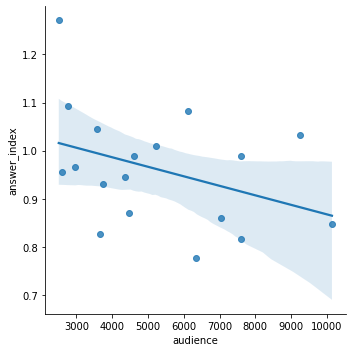

In [193]:
sns.lmplot(x='audience', y='answer_index', data = surveyau)

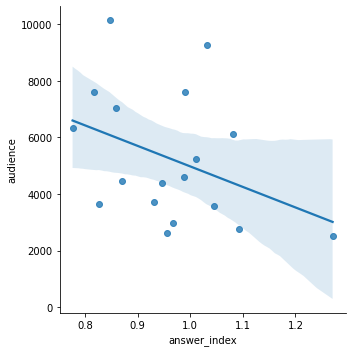

In [194]:
sns.lmplot(x='answer_index', y='audience', data = surveyau)

In [195]:
surveyau.answer_index.mean()

0.9614736439113263

In [196]:
a1208=a1_[a1_['MB_IDX']==208]

In [197]:
a2 = surveyau['game_date'].to_frame()
a2208 = pd.merge(a2, a1208, how='outer', on='game_date')
a2208.head(3)

,game_date,MB_IDX,answer_index
0,2022/02/19,208.0,1.25
1,2022/02/26,NaN,NaN
2,2022/03/05,NaN,NaN


In [198]:
for i in exlist14:
    a1i = a1_[a1_['MB_IDX']==i]
    a2i= pd.merge(a2,a1i, how='outer', on='game_date')
    a2i = a2i.fillna( {'MB_IDX': i})
    print(a2i) #excel로 csv 파일 만들어서 다시 저장

     game_date    MB_IDX  answer_index
0   2022/02/19  143631.0           NaN
1   2022/02/26  143631.0           NaN
2   2022/03/05  143631.0           0.0
3   2022/03/13  143631.0           NaN
4   2022/04/02  143631.0           NaN
5   2022/04/10  143631.0           NaN
6   2022/05/08  143631.0           NaN
7   2022/05/17  143631.0           NaN
8   2022/05/29  143631.0           NaN
9   2022/06/22  143631.0           NaN
10  2022/07/06  143631.0           NaN
11  2022/08/03  143631.0           NaN
12  2022/08/13  143631.0           NaN
13  2022/08/27  143631.0           NaN
14  2022/09/02  143631.0           NaN
15  2022/09/14  143631.0           NaN
16  2022/10/01  143631.0           NaN
17  2022/10/11  143631.0           NaN
18  2022/10/16  143631.0           NaN
     game_date    MB_IDX  answer_index
0   2022/02/19  143630.0           NaN
1   2022/02/26  143630.0           NaN
2   2022/03/05  143630.0           NaN
3   2022/03/13  143630.0           NaN
4   2022/04/02  143630.0 

In [199]:
df9 = pd.read_csv('/content/drive/MyDrive/customer_expect.csv') 
df9 = df9.loc[0:28242]
df9

,idx,game_date,MB_IDX,answer_index,participant
0,0.0,2022-02-19,96382.0,NaN,0.0
1,1.0,2022-02-26,96382.0,0.25,0.0
2,2.0,2022-03-05,96382.0,0.50,0.0
3,3.0,2022-03-13,96382.0,0.50,0.0
4,4.0,2022-04-02,96382.0,1.25,0.0
...,...,...,...,...,...
28238,28238.0,2022-09-02,151988.0,NaN,1.0
28239,28239.0,2022-09-14,151988.0,NaN,1.0
28240,28240.0,2022-10-01,151988.0,NaN,1.0
28241,28241.0,2022-10-11,151988.0,NaN,1.0


In [200]:
df9edit = df9[['game_date', 'MB_IDX', 'answer_index', 'participant']]
df9edit.head(3) #설문 만족도와 participant의 상관관계 조사

,game_date,MB_IDX,answer_index,participant
0,2022-02-19,96382.0,NaN,0.0
1,2022-02-26,96382.0,0.25,0.0
2,2022-03-05,96382.0,0.50,0.0


In [201]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [202]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer

In [203]:
train, test = train_test_split(df9edit, test_size = 0.2, stratify = df9edit['participant'],random_state = 42)
train, val = train_test_split(train, test_size = 0.2, stratify = train['participant'],random_state = 42)
print("train set:", train.shape)
print("val set:", val.shape)
print("test set:", test.shape)

train set: (18075, 4)
val set: (4519, 4)
test set: (5649, 4)


In [204]:
features = ['MB_IDX', 'answer_index']
target = 'participant'

In [205]:
X_train = train[features]
X_test = test[features]
X_val = val[features]
y_train = train[target]
y_test = test[target]
y_val = val[target]

In [206]:
base = y_train.mode()[0]
baseline = len(y_train)*[base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도는 {baseline_acc.round(3)} 입니다')

기준모델의 정확도는 0.885 입니다


In [207]:
#디시즌트리
from sklearn.tree import DecisionTreeClassifier
pipe_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=1, criterion="entropy"),
)
pipe_dt.fit(X_train, y_train)

print("훈련 정확도: ", pipe_dt.score(X_train, y_train))
print("검증 정확도: ", pipe_dt.score(X_val, y_val))

y_pred = pipe_dt.predict(X_test)

훈련 정확도:  0.9164038727524205
검증 정확도:  0.8831599911484842


In [208]:
from sklearn.metrics import classification_report

y_pred = pipe_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.48      0.23      0.31       647
         1.0       0.91      0.97      0.94      5002

    accuracy                           0.88      5649
   macro avg       0.70      0.60      0.62      5649
weighted avg       0.86      0.88      0.86      5649



In [209]:
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(max_depth = 10, random_state=42, oob_score=True, n_jobs=-1),
)

pipe_rf.fit(X_train, y_train)
print("훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("검증 정확도: ", pipe_rf.score(X_val, y_val))

훈련 정확도:  0.9030705394190871
검증 정확도:  0.8869218853728701


In [210]:
pipe_rf.named_steps["randomforestclassifier"].oob_score_

0.8878008298755187

In [211]:
y_pred = pipe_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.11      0.18       647
         1.0       0.90      0.99      0.94      5002

    accuracy                           0.89      5649
   macro avg       0.70      0.55      0.56      5649
weighted avg       0.85      0.89      0.85      5649



In [212]:
df7.tail(6)

,날짜,순위
322,2022-10-03,4
323,2022-10-08,4
324,2022-10-09,4
325,2022-10-11,4
326,2022-10-12,4
327,2022-10-16,4


In [213]:
df7.isnull().sum()

날짜    0
순위    0
dtype: int64

In [214]:
df7.duplicated().sum()

0

In [215]:
df9

,idx,game_date,MB_IDX,answer_index,participant
0,0.0,2022-02-19,96382.0,NaN,0.0
1,1.0,2022-02-26,96382.0,0.25,0.0
2,2.0,2022-03-05,96382.0,0.50,0.0
3,3.0,2022-03-13,96382.0,0.50,0.0
4,4.0,2022-04-02,96382.0,1.25,0.0
...,...,...,...,...,...
28238,28238.0,2022-09-02,151988.0,NaN,1.0
28239,28239.0,2022-09-14,151988.0,NaN,1.0
28240,28240.0,2022-10-01,151988.0,NaN,1.0
28241,28241.0,2022-10-11,151988.0,NaN,1.0


In [216]:
df8.head(3)

,reserve_no,membership_no,reserve_datetime,cancel_datetime,game_date,game_time,match_info,reserve_state_code,reserve_detail_no,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,seat_Attribute_5,seat_Attribute_6,cancel_yn,detail_cancel_date_time
0,1427279942,291,NaN,2022-02-15 00:43:44,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,ALL_CANCEL,1,1071933885,1인 테이블석(SG2),5천원 멤버십 할인권 (일반),S1구역,C열,24번,Y,2022-02-15 00:43:44
1,1427279998,1073,NaN,2022-02-14 19:44:11,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,ALL_CANCEL,1,1071933954,With석,성인,W8구역,G열,11번,Y,2022-02-14 19:44:11
2,1427279998,1073,NaN,2022-02-14 19:44:11,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,ALL_CANCEL,2,1071933955,With석,성인,W8구역,G열,13번,Y,2022-02-14 19:44:11


In [217]:
df8.isnull().sum()

reserve_no                       0
membership_no                    0
reserve_datetime              5439
cancel_datetime              48482
game_date                        0
game_time                        0
match_info                       0
reserve_state_code               0
reserve_detail_no                0
ticket_no                        0
product_grade_name               0
product_denomination_name        0
seat_Attribute_4                 0
seat_Attribute_5               159
seat_Attribute_6                 0
cancel_yn                        0
detail_cancel_date_time      48482
dtype: int64

In [218]:
df8.duplicated().sum()

0

In [219]:
df8.rename(columns = {'membership_no' : 'MB_IDX'}, inplace=True)

In [220]:
df8.MB_IDX.nunique() #예매를 한 멤버십 회원 수

7712

In [221]:
df8.dtypes

reserve_no                    int64
MB_IDX                        int64
reserve_datetime             object
cancel_datetime              object
game_date                    object
game_time                    object
match_info                   object
reserve_state_code           object
reserve_detail_no             int64
ticket_no                     int64
product_grade_name           object
product_denomination_name    object
seat_Attribute_4             object
seat_Attribute_5             object
seat_Attribute_6             object
cancel_yn                    object
detail_cancel_date_time      object
dtype: object

In [222]:
cols = ['MB_IDX', 'game_date']
df8['MB_date'] =df8[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53921 entries, 0 to 53920
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   reserve_no                 53921 non-null  int64 
 1   MB_IDX                     53921 non-null  int64 
 2   reserve_datetime           48482 non-null  object
 3   cancel_datetime            5439 non-null   object
 4   game_date                  53921 non-null  object
 5   game_time                  53921 non-null  object
 6   match_info                 53921 non-null  object
 7   reserve_state_code         53921 non-null  object
 8   reserve_detail_no          53921 non-null  int64 
 9   ticket_no                  53921 non-null  int64 
 10  product_grade_name         53921 non-null  object
 11  product_denomination_name  53921 non-null  object
 12  seat_Attribute_4           53921 non-null  object
 13  seat_Attribute_5           53762 non-null  object
 14  seat_A

In [223]:
df9['MB_IDX']=df9.MB_IDX.astype('int')
df9

,idx,game_date,MB_IDX,answer_index,participant
0,0.0,2022-02-19,96382,NaN,0.0
1,1.0,2022-02-26,96382,0.25,0.0
2,2.0,2022-03-05,96382,0.50,0.0
3,3.0,2022-03-13,96382,0.50,0.0
4,4.0,2022-04-02,96382,1.25,0.0
...,...,...,...,...,...
28238,28238.0,2022-09-02,151988,NaN,1.0
28239,28239.0,2022-09-14,151988,NaN,1.0
28240,28240.0,2022-10-01,151988,NaN,1.0
28241,28241.0,2022-10-11,151988,NaN,1.0


In [224]:
cols = ['MB_IDX', 'game_date']
df9['MB_date'] =df9[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
df9

,idx,game_date,MB_IDX,answer_index,participant,MB_date
0,0.0,2022-02-19,96382,NaN,0.0,96382-2022-02-19
1,1.0,2022-02-26,96382,0.25,0.0,96382-2022-02-26
2,2.0,2022-03-05,96382,0.50,0.0,96382-2022-03-05
3,3.0,2022-03-13,96382,0.50,0.0,96382-2022-03-13
4,4.0,2022-04-02,96382,1.25,0.0,96382-2022-04-02
...,...,...,...,...,...,...
28238,28238.0,2022-09-02,151988,NaN,1.0,151988-2022-09-02
28239,28239.0,2022-09-14,151988,NaN,1.0,151988-2022-09-14
28240,28240.0,2022-10-01,151988,NaN,1.0,151988-2022-10-01
28241,28241.0,2022-10-11,151988,NaN,1.0,151988-2022-10-11


In [225]:
df98 = pd.merge(df9, df8, how='outer', on='MB_date')
surdf98 = df98[df98['MB_IDX_x'].isin(surculist)] #설문에 응한 사람들의 예약 내역
surdf98.rename(columns = {'game_date_x' : 'game_date'}, inplace=True)
surdf98.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38665 entries, 0 to 38664
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   idx                        38665 non-null  float64
 1   game_date                  38665 non-null  object 
 2   MB_IDX_x                   38665 non-null  float64
 3   answer_index               5023 non-null   float64
 4   participant                38665 non-null  float64
 5   MB_date                    38665 non-null  object 
 6   reserve_no                 17200 non-null  float64
 7   MB_IDX_y                   17200 non-null  float64
 8   reserve_datetime           15394 non-null  object 
 9   cancel_datetime            1806 non-null   object 
 10  game_date_y                17200 non-null  object 
 11  game_time                  17200 non-null  object 
 12  match_info                 17200 non-null  object 
 13  reserve_state_code         17200 non-null  obj

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [226]:
df10 = pd.read_csv('/content/drive/MyDrive/game_result.csv', encoding='cp949') 
df10date = df10[['game_date', 'game_time','day','previous_result', 'weather', 'temperature']]

In [227]:
complete=pd.merge(surdf98, df10date, how='inner', on='game_date')
complete=complete.sort_values(by='idx', ascending=True)
complete.columns

Index(['idx', 'game_date', 'MB_IDX_x', 'answer_index', 'participant',
       'MB_date', 'reserve_no', 'MB_IDX_y', 'reserve_datetime',
       'cancel_datetime', 'game_date_y', 'game_time_x', 'match_info',
       'reserve_state_code', 'reserve_detail_no', 'ticket_no',
       'product_grade_name', 'product_denomination_name', 'seat_Attribute_4',
       'seat_Attribute_5', 'seat_Attribute_6', 'cancel_yn',
       'detail_cancel_date_time', 'game_time_y', 'day', 'previous_result',
       'weather', 'temperature'],
      dtype='object')

In [228]:
edcomplete = complete[['idx', 'game_date', 'game_time_y', 'MB_IDX_x', 'answer_index', 'participant', 'reserve_datetime', 'cancel_datetime', 'day', 'previous_result', 'weather', 'temperature', 'reserve_state_code', 'reserve_detail_no', 'ticket_no',
       'product_grade_name', 'product_denomination_name', 'seat_Attribute_4',
       'seat_Attribute_5', 'seat_Attribute_6', 'cancel_yn']]
edcomplete.head(10)

,idx,game_date,game_time_y,MB_IDX_x,answer_index,participant,reserve_datetime,cancel_datetime,day,previous_result,...,temperature,reserve_state_code,reserve_detail_no,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,seat_Attribute_5,seat_Attribute_6,cancel_yn
0,0.0,2022-02-19,16:30,96382.0,NaN,0.0,2022-02-15 14:21:26,NaN,토,NaN,...,-1.7,COMPLETE,1.0,1.071955e+09,S석,ㅅㅇ전 게임권,S11구역,A열,9번,N
2103,1.0,2022-02-26,14:00,96382.0,0.25,0.0,2022-02-22 14:05:53,NaN,토,0.0,...,4.1,COMPLETE,1.0,1.072078e+09,S석,ㅅㅇ전 게임권,S11구역,B열,13번,N
4021,2.0,2022-03-05,19:00,96382.0,0.50,0.0,NaN,2022-03-01 14:09:38,토,0.0,...,2.0,ALL_CANCEL,1.0,1.072215e+09,S석,성인,S11구역,B열,13번,Y
5896,3.0,2022-03-13,14:00,96382.0,0.50,0.0,NaN,NaN,일,1.0,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7721,4.0,2022-04-02,14:00,96382.0,1.25,0.0,2022-03-30 13:54:59,NaN,토,0.0,...,6.8,COMPLETE,1.0,1.072870e+09,S석,예매권북,S11구역,B열,10번,N
9717,5.0,2022-04-10,16:30,96382.0,1.25,0.0,NaN,NaN,일,0.0,...,16.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11821,6.0,2022-05-08,16:30,96382.0,1.25,0.0,2022-05-04 15:14:36,NaN,일,2.0,...,15.2,COMPLETE,1.0,1.074612e+09,S석,"5,000포인트 할인 쿠폰(성인)",S11구역,B열,13번,N
14000,7.0,2022-05-17,19:30,96382.0,1.25,0.0,NaN,NaN,화,2.0,...,17.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15704,8.0,2022-05-29,16:30,96382.0,1.25,0.0,NaN,NaN,일,1.0,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17683,9.0,2022-06-22,19:30,96382.0,2.25,1.0,NaN,NaN,수,1.0,...,22.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
df11 = pd.read_csv('/content/drive/MyDrive/daterank.csv') 
df11.head(3)

,Date,Rank
0,2022-02-19,2.0
1,2022-02-20,4.0
2,2022-02-21,NaN


In [230]:
cols = ['reserve_datetime', 'cancel_datetime']
edcomplete['decision_time'] =edcomplete[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
edcomplete

<ipython-input-230-776e91bc45f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edcomplete['decision_time'] =edcomplete[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


,idx,game_date,game_time_y,MB_IDX_x,answer_index,participant,reserve_datetime,cancel_datetime,day,previous_result,...,reserve_state_code,reserve_detail_no,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,seat_Attribute_5,seat_Attribute_6,cancel_yn,decision_time
0,0.0,2022-02-19,16:30,96382.0,NaN,0.0,2022-02-15 14:21:26,NaN,토,NaN,...,COMPLETE,1.0,1.071955e+09,S석,ㅅㅇ전 게임권,S11구역,A열,9번,N,2022-02-15 14:21:26 nan
2103,1.0,2022-02-26,14:00,96382.0,0.25,0.0,2022-02-22 14:05:53,NaN,토,0.0,...,COMPLETE,1.0,1.072078e+09,S석,ㅅㅇ전 게임권,S11구역,B열,13번,N,2022-02-22 14:05:53 nan
4021,2.0,2022-03-05,19:00,96382.0,0.50,0.0,NaN,2022-03-01 14:09:38,토,0.0,...,ALL_CANCEL,1.0,1.072215e+09,S석,성인,S11구역,B열,13번,Y,nan 2022-03-01 14:09:38
5896,3.0,2022-03-13,14:00,96382.0,0.50,0.0,NaN,NaN,일,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan nan
7721,4.0,2022-04-02,14:00,96382.0,1.25,0.0,2022-03-30 13:54:59,NaN,토,0.0,...,COMPLETE,1.0,1.072870e+09,S석,예매권북,S11구역,B열,10번,N,2022-03-30 13:54:59 nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29676,28238.0,2022-09-02,19:30,151988.0,NaN,1.0,NaN,NaN,금,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan nan
31629,28239.0,2022-09-14,19:00,151988.0,NaN,1.0,NaN,NaN,수,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan nan
34116,28240.0,2022-10-01,16:30,151988.0,NaN,1.0,NaN,NaN,토,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan nan
35994,28241.0,2022-10-11,19:30,151988.0,NaN,1.0,NaN,NaN,화,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan nan


In [231]:
recom = complete[['idx', 'reserve_datetime']]
recom['reserve_datetime'] = recom.reserve_datetime.str.split(' ').str[0]
recom.rename(columns = {'reserve_datetime' : 'date_time'}, inplace=True)
recom

<ipython-input-231-de1a930f459a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recom['reserve_datetime'] = recom.reserve_datetime.str.split(' ').str[0]
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,idx,date_time
0,0.0,2022-02-15
2103,1.0,2022-02-22
4021,2.0,NaN
5896,3.0,NaN
7721,4.0,2022-03-30
...,...,...
29676,28238.0,NaN
31629,28239.0,NaN
34116,28240.0,NaN
35994,28241.0,NaN


In [232]:
cancom = complete[['idx', 'cancel_datetime']]
cancom['cancel_datetime'] = cancom.cancel_datetime.str.split(' ').str[0]
cancom.rename(columns = {'cancel_datetime' : 'date_time'}, inplace=True)
cancom

<ipython-input-232-a3efc78efa81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancom['cancel_datetime'] = cancom.cancel_datetime.str.split(' ').str[0]
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,idx,date_time
0,0.0,NaN
2103,1.0,NaN
4021,2.0,2022-03-01
5896,3.0,NaN
7721,4.0,NaN
...,...,...
29676,28238.0,NaN
31629,28239.0,NaN
34116,28240.0,NaN
35994,28241.0,NaN


In [233]:
update1=cancom.combine_first(recom)
update1

,idx,date_time
0,0.0,2022-02-15
2103,1.0,2022-02-22
4021,2.0,2022-03-01
5896,3.0,NaN
7721,4.0,2022-03-30
...,...,...
29676,28238.0,NaN
31629,28239.0,NaN
34116,28240.0,NaN
35994,28241.0,NaN


In [234]:
uped=edcomplete[['idx', 'game_date']]
uped.rename(columns = {'game_date' : 'date_time'}, inplace=True)
uped

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,idx,date_time
0,0.0,2022-02-19
2103,1.0,2022-02-26
4021,2.0,2022-03-05
5896,3.0,2022-03-13
7721,4.0,2022-04-02
...,...,...
29676,28238.0,2022-09-02
31629,28239.0,2022-09-14
34116,28240.0,2022-10-01
35994,28241.0,2022-10-11


In [235]:
final=update1.combine_first(uped)
final

,idx,date_time
0,0.0,2022-02-15
2103,1.0,2022-02-22
4021,2.0,2022-03-01
5896,3.0,2022-03-13
7721,4.0,2022-03-30
...,...,...
29676,28238.0,2022-09-02
31629,28239.0,2022-09-14
34116,28240.0,2022-10-01
35994,28241.0,2022-10-11


In [236]:
edcomplete['decision_time'] = final['date_time']
edcomplete.to_csv('complete_edited.csv', index=False)

<ipython-input-236-dd13d673259c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edcomplete['decision_time'] = final['date_time']


In [237]:
df12 = pd.read_csv('/content/drive/MyDrive/complete_edited.csv', encoding='cp949')
df12 #설문에 참여하지 않았지만 방문한 고객의 참여 여부 수정 후 재업로드

,idx,game_date,game_time_y,MB_IDX_x,answer_index,survey_participant,participant,reserve_datetime,cancel_datetime,day,...,reserve_state_code,reserve_detail_no,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,seat_Attribute_5,seat_Attribute_6,cancel_yn,decision_time
0,0,2022-02-19,16:30,96382,NaN,0,0,2022-02-15 14:21,NaN,토,...,COMPLETE,1.0,1.071955e+09,S석,ㅅㅇ전 게임권,S11구역,A열,9번,N,2022-02-15
1,1,2022-02-26,14:00,96382,0.25,0,0,2022-02-22 14:05,NaN,토,...,COMPLETE,1.0,1.072078e+09,S석,ㅅㅇ전 게임권,S11구역,B열,13번,N,2022-02-22
2,2,2022-03-05,19:00,96382,0.50,0,0,NaN,2022-03-01 14:09,토,...,ALL_CANCEL,1.0,1.072215e+09,S석,성인,S11구역,B열,13번,Y,2022-03-01
3,3,2022-03-13,14:00,96382,0.50,0,0,NaN,NaN,일,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-13
4,4,2022-04-02,14:00,96382,1.25,0,0,2022-03-30 13:54,NaN,토,...,COMPLETE,1.0,1.072870e+09,S석,예매권북,S11구역,B열,10번,N,2022-03-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38520,28238,2022-09-02,19:30,151988,NaN,1,1,NaN,NaN,금,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-02
38521,28239,2022-09-14,19:00,151988,NaN,1,1,NaN,NaN,수,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-14
38522,28240,2022-10-01,16:30,151988,NaN,1,1,NaN,NaN,토,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-01
38523,28241,2022-10-11,19:30,151988,NaN,1,1,NaN,NaN,화,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-11


In [238]:
df12 = df12.reset_index()

In [239]:
df11 =df11.fillna(method='ffill')
df11.head(3) #전체 날짜별 팀 순위

,Date,Rank
0,2022-02-19,2.0
1,2022-02-20,4.0
2,2022-02-21,4.0


In [240]:
df11.rename(columns = {'Date' : 'decision_time'}, inplace=True)
df11

,decision_time,Rank
0,2022-02-19,2.0
1,2022-02-20,4.0
2,2022-02-21,4.0
3,2022-02-22,4.0
4,2022-02-23,4.0
...,...,...
235,2022-10-12,4.0
236,2022-10-13,4.0
237,2022-10-14,4.0
238,2022-10-15,4.0


In [241]:
sdf12 = df12[['index', 'decision_time']]
pre=pd.merge(sdf12, df11, how='outer', on='decision_time')
pre=pre.sort_values(by='index', ascending=True)
pre=pre[['index', 'Rank']]

In [242]:
pre=pre[pre['index'].notnull()]

In [243]:
final =pd.merge(df12, pre, how='outer', on='index')
final = final.drop('index', axis = 1)
final.head(10)

,idx,game_date,game_time_y,MB_IDX_x,answer_index,survey_participant,participant,reserve_datetime,cancel_datetime,day,...,reserve_detail_no,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,seat_Attribute_5,seat_Attribute_6,cancel_yn,decision_time,Rank
0,0,2022-02-19,16:30,96382,NaN,0,0,2022-02-15 14:21,NaN,토,...,1.0,1.071955e+09,S석,ㅅㅇ전 게임권,S11구역,A열,9번,N,2022-02-15,NaN
1,1,2022-02-26,14:00,96382,0.25,0,0,2022-02-22 14:05,NaN,토,...,1.0,1.072078e+09,S석,ㅅㅇ전 게임권,S11구역,B열,13번,N,2022-02-22,4.0
2,2,2022-03-05,19:00,96382,0.50,0,0,NaN,2022-03-01 14:09,토,...,1.0,1.072215e+09,S석,성인,S11구역,B열,13번,Y,2022-03-01,2.0
3,3,2022-03-13,14:00,96382,0.50,0,0,NaN,NaN,일,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-13,3.0
4,4,2022-04-02,14:00,96382,1.25,0,0,2022-03-30 13:54,NaN,토,...,1.0,1.072870e+09,S석,예매권북,S11구역,B열,10번,N,2022-03-30,2.0
5,5,2022-04-10,16:30,96382,1.25,0,0,NaN,NaN,일,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-10,2.0
6,6,2022-05-08,16:30,96382,1.25,0,0,2022-05-04 15:14,NaN,일,...,1.0,1.074612e+09,S석,"5,000포인트 할인 쿠폰(성인)",S11구역,B열,13번,N,2022-05-04,2.0
7,7,2022-05-17,19:30,96382,1.25,0,0,NaN,NaN,화,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-17,3.0
8,8,2022-05-29,16:30,96382,1.25,0,0,NaN,NaN,일,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-29,4.0
9,9,2022-06-22,19:30,96382,2.25,1,1,NaN,NaN,수,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-22,4.0


In [244]:
final.columns

Index(['idx', 'game_date', 'game_time_y', 'MB_IDX_x', 'answer_index',
       'survey_participant', 'participant', 'reserve_datetime',
       'cancel_datetime', 'day', 'previous_result', 'weather', 'temperature',
       'reserve_state_code', 'reserve_detail_no', 'ticket_no',
       'product_grade_name', 'product_denomination_name', 'seat_Attribute_4',
       'seat_Attribute_5', 'seat_Attribute_6', 'cancel_yn', 'decision_time',
       'Rank'],
      dtype='object')

In [245]:
final.to_csv('final_1.csv', index=False)

In [246]:
final

,idx,game_date,game_time_y,MB_IDX_x,answer_index,survey_participant,participant,reserve_datetime,cancel_datetime,day,...,reserve_detail_no,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,seat_Attribute_5,seat_Attribute_6,cancel_yn,decision_time,Rank
0,0,2022-02-19,16:30,96382,NaN,0,0,2022-02-15 14:21,NaN,토,...,1.0,1.071955e+09,S석,ㅅㅇ전 게임권,S11구역,A열,9번,N,2022-02-15,NaN
1,1,2022-02-26,14:00,96382,0.25,0,0,2022-02-22 14:05,NaN,토,...,1.0,1.072078e+09,S석,ㅅㅇ전 게임권,S11구역,B열,13번,N,2022-02-22,4.0
2,2,2022-03-05,19:00,96382,0.50,0,0,NaN,2022-03-01 14:09,토,...,1.0,1.072215e+09,S석,성인,S11구역,B열,13번,Y,2022-03-01,2.0
3,3,2022-03-13,14:00,96382,0.50,0,0,NaN,NaN,일,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-13,3.0
4,4,2022-04-02,14:00,96382,1.25,0,0,2022-03-30 13:54,NaN,토,...,1.0,1.072870e+09,S석,예매권북,S11구역,B열,10번,N,2022-03-30,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38520,28238,2022-09-02,19:30,151988,NaN,1,1,NaN,NaN,금,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-02,4.0
38521,28239,2022-09-14,19:00,151988,NaN,1,1,NaN,NaN,수,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-14,4.0
38522,28240,2022-10-01,16:30,151988,NaN,1,1,NaN,NaN,토,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-01,4.0
38523,28241,2022-10-11,19:30,151988,NaN,1,1,NaN,NaN,화,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-11,4.0


In [247]:
final.columns

Index(['idx', 'game_date', 'game_time_y', 'MB_IDX_x', 'answer_index',
       'survey_participant', 'participant', 'reserve_datetime',
       'cancel_datetime', 'day', 'previous_result', 'weather', 'temperature',
       'reserve_state_code', 'reserve_detail_no', 'ticket_no',
       'product_grade_name', 'product_denomination_name', 'seat_Attribute_4',
       'seat_Attribute_5', 'seat_Attribute_6', 'cancel_yn', 'decision_time',
       'Rank'],
      dtype='object')

In [248]:
final[['idx', 'game_date', 'game_time_y', 'MB_IDX_x', 'answer_index','Rank','previous_result','weather', 'temperature','cancel_yn',]]

,idx,game_date,game_time_y,MB_IDX_x,answer_index,Rank,previous_result,weather,temperature,cancel_yn
0,0,2022-02-19,16:30,96382,NaN,NaN,NaN,Cloudy,-1.7,N
1,1,2022-02-26,14:00,96382,0.25,4.0,0.0,Cloudy,4.1,N
2,2,2022-03-05,19:00,96382,0.50,2.0,0.0,Sunny,2.0,Y
3,3,2022-03-13,14:00,96382,0.50,3.0,1.0,Rainy,10.0,NaN
4,4,2022-04-02,14:00,96382,1.25,2.0,0.0,Sunny,6.8,N
...,...,...,...,...,...,...,...,...,...,...
38520,28238,2022-09-02,19:30,151988,NaN,4.0,0.0,Sunny,25.1,NaN
38521,28239,2022-09-14,19:00,151988,NaN,4.0,2.0,Cloudy,24.4,NaN
38522,28240,2022-10-01,16:30,151988,NaN,4.0,1.0,Cloudy,19.6,NaN
38523,28241,2022-10-11,19:30,151988,NaN,4.0,2.0,Sunny,11.1,NaN
